# Getting started with JavaScript

`tslab` supports JavaScript too.
This notebook demostrates the basic usage of tslab with JavaScript and how types help your JavaScript programming.

## Writing and running your code interactively

- Write and run TypeScript interactively.
- To complete code, press `Tab`.
- To inspect code, press `Shift-Tab`.
- Although you are writing JavaScript, tslab delivers the power of types to you.
  - tslab provides a great code completion and inspection thanks to types.
  - tslab checks types statically and detect careless mistakes.
- I hope more people notice the power of types in JavaScript and start to learn [TypeScript](https://www.typescriptlang.org/).

In [ ]:
const tslab = require('tslab');

console.log('Hello, tslab!')
console.log('Versions:', tslab.versions)

Hello, tslab!
Versions: { tslab: '1.0.14', typescript: '4.1.2', node: 'v14.15.1' }


In [ ]:
function naiveFib(n) {
    if (n > 1) {
        return naiveFib(n - 1) + naiveFib(n - 2);
    }
    return 1;
}

In [ ]:
{
    // This is 40x slower if you use Python.
    const n = 40;
    const start = Date.now()
    console.log(`naiveFib(${n}) = ${naiveFib(n)} (took ${Date.now() - start}ms)`)
}

naiveFib(40) = 165580141 (took 1418ms)


## Static type checking

`tslab` checks types in Javascript.
Read [Type Checking JavaScript Files](https://www.typescriptlang.org/docs/handbook/type-checking-javascript-files.html) tutorial to learn type checking for JavaScript.

In [ ]:
let now = Date.now();
now += 'hello';  // This looks unintentional.
console.log(now);

2:1 - Type 'string' is not assignable to type 'number'.


## class

In [ ]:
class Hello {
    constructor(name) {
        // In TypeScript, this line fails with "Property 'name' does not exist on type 'Hello'.".
        // But this is valid in JavaScript mode.
        this.name = name;
    }
    
    sayHello() {
        console.log(`Hello, ${this.name} in JavaScript`);
    }
}

const hello = new Hello('tslab');
hello.sayHello();

Hello, tslab in JavaScript


## Promise and async await

tslab supports `async` and `await` from ES2017. tslab also supports top-level `await`.
You can call asynchronous functions easily in tslab.

In [ ]:
let sleep = (ms) => new Promise(resolve => setTimeout(resolve, ms));
const start = Date.now();
// Top-level await.
await sleep(500);
`Slept ${Date.now() - start}[ms]`

Slept 501[ms]


In [ ]:
// If you don't `await`, tslab shows `Promise` immediately.
sleep(500);

Promise { <pending> }


## display

To display non-plain text data, use `tslab.display`.

In [ ]:
const fs = require("fs");
const tslab = require("tslab");

### display HTML

In [ ]:
tslab.display.html('Hello <span style="font-size:x-large"><b>Java</b>Script</span>!');

Hello Java Script !

### display images

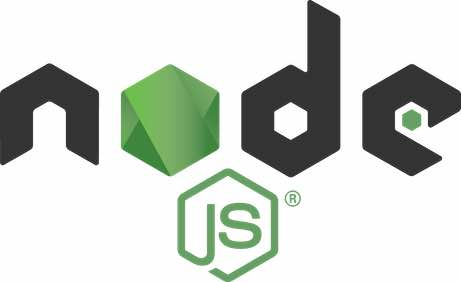

In [ ]:
tslab.display.jpeg(fs.readFileSync('images/nodejs-new-pantone-black.jpg'))

### animation

`tslab.newDisplay` creates a new `Display` instance to display and update rich contents.

In [ ]:
{
    let display = tslab.newDisplay();
    for (let progress = 1; progress <= 100; progress++) {
      await sleep(20);
      display.text(`progress: ${progress}%`);
    }
}

progress: 100%

## Supported JavaScript/TypeScript language features

`tslab` uses `TypeScript 3.7` internally. You can use all of latest JavaScript language features and even the latest features supported from `TypeScript 3.7`.

### ES2015 (ES6)

Demostrations of selected [ES2015 features](https://babeljs.io/docs/en/learn/).

In [ ]:
{
    // class
    class MyObj {
        constructor(abc, xyz) {
            this.abc = abc;
            this.xyz = xyz;
        }
    }
    // const and let
    const obj = new MyObj(123, 'hello');
    // Destructuring
    let {abc, xyz: klm} =  obj;
    // Enhanced Object Literals
    console.log({abc, klm});
    
    // Spread
    let [x, y, z] = [1, 2, 3];
    console.log({x, y, z})
    
    // Generator and for-of
    let array = [];
    for (let e of (function*(n) {
        for (let i = 0; i < n; i += 2) {
            yield i;
        }
    })(10)) {
        array.push(e * e);
    }
    console.log('array =', array);
}

{ abc: 123, klm: 'hello' }
{ x: 1, y: 2, z: 3 }
array = [ 0, 4, 16, 36, 64 ]


### ES2017

tslab supports `async` and `await` from ES2017. tslab also supports top-level `await`.
You can call asynchronous functions easily in tslab.

In [ ]:
let fn = async () => {
    let sleep = (ms) => new Promise(resolve => setTimeout(resolve, ms));
    const start = Date.now();
    await sleep(500);
    return `Slept ${Date.now() - start}[ms]`
}
await fn();

Slept 501[ms]


### ESNext
TypeScript supports some advanced JavaScript features.

In [ ]:
{
    // 1. Optional Chaining
    // https://devblogs.microsoft.com/typescript/announcing-typescript-3-7/#optional-chaining
    let obj = {x: null};
    console.log('obj?.x?.z ==', obj?.x?.z);

    // 2. Nullish Coalescing
    // https://devblogs.microsoft.com/typescript/announcing-typescript-3-7/#nullish-coalescing
    let x = null, y = 0, z = 'hello';
    console.log('x ?? y ?? z ==', x ?? y ?? z);
}

obj?.x?.z == undefined
x ?? y ?? z == 0


## import and require

tslab supports both [ES Modules](https://www.typescriptlang.org/docs/handbook/modules.html#import) and [CommonJS](https://www.typescriptlang.org/docs/handbook/type-checking-javascript-files.html#commonjs-modules-are-supported).
You can use both `import` (ES Modules) and `require` (CommonJS) to import modules in tslab.

In [ ]:
// same as:
// import os from "os";
// import * as os from "os";
let os = require("os");
os.cpus()[0].model

Intel(R) Xeon(R) CPU @ 2.20GHz


## Advanced topics for type checking

`tslab` checks types statically in JavaScript.
tslab sometimes show type errors for valid JavaScript code.
For example, tslab shows a type-error for the following code thought it's 100% valid as JavaScript if it's intentional.

In [ ]:
let x = 123;
x += ' hello';
console.log(x);

2:1 - Type 'string' is not assignable to type 'number'.


If you really want to assign a `number` and `string` to the same variable `x`, you need to tell the type-checker that `x` can be `any` types of values explicitly.

In [ ]:
/** @type {any} */
let x = 123;
x += ' hello';
console.log(x);

123 hello


To learn more about the static type checking in JavaScript, read [Type Checking JavaScript Files](https://www.typescriptlang.org/docs/handbook/type-checking-javascript-files.html).